# The goal of this notebook

In [1]:
# load in dataset, remove unnecessary columns, and deal with missing values

# next step is EDA

# Import all modules and load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
loan_data = pd.read_csv('accepted_2007_to_2018Q4.csv')
loan_data.shape

/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2260701, 151)

# Review different types of loan status'

In [4]:
# how many loan status' rows are available

unique_predictor_values = list(loan_data['loan_status'].unique())
labels = list(loan_data['loan_status'].value_counts())

predictor_df = pd.DataFrame(list(zip(unique_predictor_values, labels)), 
               columns =['Name', 'val'])
predictor_df['%'] = predictor_df['val'] / predictor_df['val'].sum()

predictor_df

,Name,val,%
0,Fully Paid,1076751,0.476298
1,Current,878317,0.388521
2,Charged Off,268559,0.118796
3,In Grace Period,21467,0.009496
4,Late (31-120 days),8436,0.003732
5,Late (16-30 days),4349,0.001924
6,Default,1988,0.000879
7,NaN,761,0.000337
8,Does not meet the credit policy. Status:Fully ...,40,0.000018


In [5]:
# we only want to look at Fully Paid and Charged off

# charged off --> 11.9% of all loans in dataset
# fully paid  --> 47.6% of all loans in datset

# all other values do not have a final predictor for our model
    # may use them at the end of the project to predict in-process loan performance

In [6]:
# create working dataset with only fully paid and charged off loans

useful_status = ['Fully Paid', 'Charged Off']

predictor_df = loan_data[loan_data.loan_status.isin(useful_status)]
predictor_df.shape


(1345310, 151)

# Remove columns with <10% data

In [7]:
# find missing values for each column

missing = pd.concat([predictor_df.isnull().sum(), 100 * predictor_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')


,count,%
id,0,0.000000
fico_range_high,0,0.000000
hardship_flag,0,0.000000
open_acc,0,0.000000
pub_rec,0,0.000000
revol_bal,0,0.000000
total_acc,0,0.000000
initial_list_status,0,0.000000
out_prncp,0,0.000000
out_prncp_inv,0,0.000000


In [8]:
# define list of columns with a large amount of missing values

large_missing = missing[missing['%'] > 90] 
columns_to_drop = list(large_missing.index)
len(large_missing)
columns_to_drop


['member_id',
 'desc',
 'next_pymnt_d',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [9]:
# drop these columns with more than 90% of its data missing

predictor_df = predictor_df.drop(columns_to_drop, axis=1)


In [10]:
predictor_df.shape

(1345310, 112)

In [11]:
predictor_df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.

In [12]:
# look at ratio of fully paid vs charged off

fully_paid = len(predictor_df[predictor_df['loan_status'] == 'Fully Paid']) 
charged_off = len(predictor_df[predictor_df['loan_status'] == 'Charged Off'])

print('Fully Paid Count: ' + str(fully_paid))
print('Fully Paid Count: ' + str(charged_off))
print('Fully Paid / Charged Off Ratio: ' + str(fully_paid/charged_off))

Fully Paid Count: 1076751
Fully Paid Count: 268559
Fully Paid / Charged Off Ratio: 4.009364795072964


There are 4x Fully Paid vs Charged Off

# Set dataframe index

In [13]:
# set index to 'id column' - this is unique for each row

predictor_df.set_index('id')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,ma

# Create Dataframe of equal number of loans for Fully Paid and Charged Off

In [14]:
# This will likely hurt the model accuracy overall because the model will learn ~85% 
# are fully paid vs charged off. The goal with this is to increase the Charged Off prediction. 

fully_paid = predictor_df[predictor_df['loan_status'] == 'Fully Paid'].sample(n=100000)
print(fully_paid.shape)

charged_off = predictor_df[predictor_df['loan_status'] == 'Charged Off'].sample(n=100000)
print(charged_off.shape)


(100000, 112)
(100000, 112)


In [15]:
list = [fully_paid, charged_off]

sampled_df = pd.concat(list)
sampled_df.shape

(200000, 112)

# Review which columns have valuable info

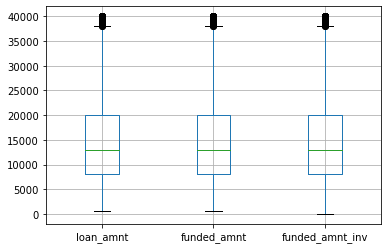

In [16]:
 boxplot = sampled_df.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'])

In [17]:
# all 3 of these columns are showing the same data ie how much money was provided. Keep loan_amnt and drop the others.

del sampled_df['funded_amnt_inv']
del sampled_df['funded_amnt']

In [18]:
# int_rate, installment, income, dti, delinq_2yrs are all keepers 

# dti - Debt to income minus current loan amonut excluding mortgage

# int_rate - loan interest rate

# delinq_2yrs - the number of accounts on which the borrower is now delinquent over 2 years

(600.0, 900.0)

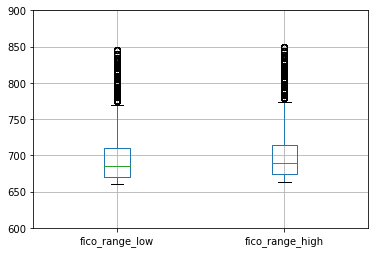

In [19]:
# fico_range_high - the upper boundary range the borrower’s FICO at loan origination belongs to.
# fico_range_low - the lower boundary range the borrower’s FICO at loan origination belongs to.

boxplot = sampled_df.boxplot(column=['fico_range_low', 'fico_range_high'])
plt.ylim(600, 900)

In [20]:
# this shows the same information. maybe the difference between the 2 will yeild information.

sampled_df['fico_range'] = sampled_df['fico_range_high'] - sampled_df['fico_range_low']
sampled_df['fico_range'].value_counts()

4.0    199988
5.0        12
Name: fico_range, dtype: int64

In [21]:
# Nope. a difference of 4 or 5 vs 700-800 is insignificant. I'll keep the high and move on.

del sampled_df['fico_range_low']
del sampled_df['fico_range']

(400.0, 900.0)

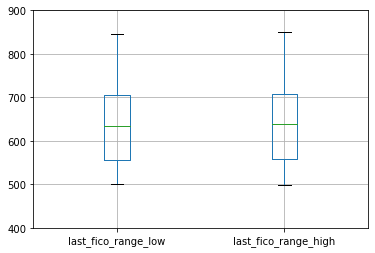

In [22]:
# lets deal with all fico related columns now then we'll return to inq_last_6mnths

# last_fico_range_high - the upper boundary range the borrower’s last FICO pulled belongs to.
# last_fico_range_low - the lower boundary range the borrower’s last FICO pulled belongs to.

# larger 75% quartile from last boxplot likely due to a variation of the last time the fico was pulled (yesterday vs 10 years ago)

boxplot = sampled_df.boxplot(column=['last_fico_range_low', 'last_fico_range_high'])
plt.ylim(400, 900)

In [23]:
sampled_df['last_fico_range'] = sampled_df['last_fico_range_high'] - sampled_df['last_fico_range_low']
sampled_df['last_fico_range'].value_counts()

4.0      188085
499.0     11876
0.0          26
5.0          13
Name: last_fico_range, dtype: int64

In [24]:
# both these columns are mostly the same. 
# there are some with a large difference from low to high which may provide insight on a drop in fico. 
# I already have the 'fico_range_high' and 'last_fico_range' so I'll just keep those two.

del sampled_df['last_fico_range_low']
del sampled_df['last_fico_range_high']

In [25]:
sampled_df.shape

(200000, 108)

In [26]:
sampled_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,last_fico_range
2101000,124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,NaN,16.0,0.0,8294.0,14.7,36.0,w,0.0,0.0,7542.887792,7542.89,7500.0,42.89,0.0,0.0,0.0,Jan-2018,1.54,Nov-2018,0.0,37.0,1.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,NaN,4.0,NaN,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,Cash,N,4.0
1290816,14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,11691.0,41.9,26.0,w,0.0,0.0,14811.260000,14811.26,13000.0,1811.26,0.0,0.0,0.0,Dec-2015,7151.36,Jul-2017,1.0,NaN,1.0,Individual,0.0,221.0,11691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,Cash,N,4.0
1666295,102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,NaN,19.0,0.0,1196.0,1.8,38.0,w,0.0,0.0,17677.374175,17677.37,16000.0,1677.37,0.0,0.0,0.0,Feb-2018,14421.12,Feb-2019,0.0,NaN,1.0,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,NaN,0.0,NaN,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,Cash,N,4.0
617240,113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,NaN,16.0,0.0,14171.0,30.3,24.0,w,0.0,0.0,17484.878682,17484.88,15000.0,2484.88,0.0,0.0,0.0,Aug-2018,12732.30,Se

In [27]:
# now back to cleaning from left to right:

# term, int_rate, installment, grade, sub-grade, emp_title, emp_length, home_ownsership, annual_inc, verification_status, issue_d 
# all good catagorical features to keep for EDA

In [28]:
sampled_df['pymnt_plan'].value_counts()

n    200000
Name: pymnt_plan, dtype: int64

In [29]:
# no info here. remove

del sampled_df['pymnt_plan']

In [30]:
# no info here. remove

del sampled_df['url']

In [31]:
sampled_df['purpose'].value_counts()

debt_consolidation    118481
credit_card            41424
home_improvement       12557
other                  11812
major_purchase          4230
small_business          2711
medical                 2452
car                     1934
moving                  1483
vacation                1311
house                   1129
wedding                  298
renewable_energy         140
educational               38
Name: purpose, dtype: int64

In [32]:
sampled_df['purpose'].isnull()

2101000    False
1290816    False
1666295    False
617240     False
1225159    False
           ...  
2032657    False
1854484    False
1310715    False
172441     False
1292734    False
Name: purpose, Length: 200000, dtype: bool

In [33]:
sampled_df['title'].value_counts()

Debt consolidation                 101542
Credit card refinancing             35524
Home improvement                    10852
Other                               10182
Major purchase                       3539
                                    ...  
credit card consol                      1
November Loan                           1
Debt Consolidation/Wedding Loan         1
Lifeline                                1
New home                                1
Name: title, Length: 11123, dtype: int64

In [34]:
# purpose and title are duplicates. title is more messy so remove

del sampled_df['title']

In [35]:
sampled_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,last_fico_range
2101000,124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,NaN,16.0,0.0,8294.0,14.7,36.0,w,0.0,0.0,7542.887792,7542.89,7500.0,42.89,0.0,0.0,0.0,Jan-2018,1.54,Nov-2018,0.0,37.0,1.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,NaN,4.0,NaN,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,Cash,N,4.0
1290816,14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,11691.0,41.9,26.0,w,0.0,0.0,14811.260000,14811.26,13000.0,1811.26,0.0,0.0,0.0,Dec-2015,7151.36,Jul-2017,1.0,NaN,1.0,Individual,0.0,221.0,11691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,Cash,N,4.0
1666295,102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,NaN,19.0,0.0,1196.0,1.8,38.0,w,0.0,0.0,17677.374175,17677.37,16000.0,1677.37,0.0,0.0,0.0,Feb-2018,14421.12,Feb-2019,0.0,NaN,1.0,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,NaN,0.0,NaN,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,Cash,N,4.0
617240,113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,NaN,16.0,0.0,14171.0,30.3,24.0,w,0.0,0.0,17484.878682,17484.88,15000.0,2484.88,0.0,0.0,0.0,Aug-2018,12732.30,Sep-2018,0.0,NaN,1.0,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,Ca

In [36]:
# inq_last_6mths - the number of inquiries in past 6 months (excluding auto and mortgage inquiries)
# this could be a negative sign. definitely keep.

# open_acc - the number of open credit lines in the borrower’s credit file.
# this could be a negative sign. definitely keep.

# pub_rec - number of derogatory public records
# this could be a negative sign. definitely keep.

# revol_bal - total credit owed to lender a the time of inquiry

# revol_util - % of credit limit used. This is a better look at overall health vs absolute value (revol_bal). 
# Let's remove revol_bal and keep revol_util 

del sampled_df['revol_bal']

# total_acc - the total number of credit lines currently in the borrower’s credit file
# this goes hand in hand with open_acc. Keep. 

# out_prncp - remaining outstanding principal for total amount funded for current loans being filled. This 
# this doesnt help us because we dont have an answer on the loan. Remove.

del sampled_df['out_prncp']

# out_prncp_inv - remaining outstanding principal for portion of total amount funded by investors
# same as out_prncp. remove. 

del sampled_df['out_prncp_inv']

# total_pymnt	Payments received to date for total amount funded
# same as above. Remove.

del sampled_df['total_pymnt']

# total_rec_int	Interest received to date
# same as above. Remove.

del sampled_df['total_rec_int']

# total_rec_prncp	Principal received to date
# same as above. Remove.

del sampled_df['total_rec_prncp']

# total_rec_late_fee	Late fees received to date
# same as above. Remove.

del sampled_df['total_rec_late_fee']

# recoveries	post charge off gross recovery
# same as above. Remove.

del sampled_df['recoveries']

# collection_recovery_fee	post charge off collection fee
# same as above. Remove.

del sampled_df['collection_recovery_fee']

# collections_12_mths_ex_med	Number of collections in 12 months excluding medical collections
# this could be a negative sign. definitely keep.


# policy_code	publicly available policy_code=1 - new products not publicly available policy_code=2
# need to investigate before keeping/removing


# acc_now_delinq	The number of accounts on which the borrower is now delinquent.
# this could be a negative sign. definitely keep.

# chargeoff_within_12_mths	Number of charge-offs within 12 months
# this could be a negative sign. definitely keep.


# pub_rec_bankruptcies	Number of public record bankruptcies
# this could be a negative sign. definitely keep.

# tax_liens	Number of tax liens
# this could be a negative sign. definitely keep.


In [37]:
sampled_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,last_fico_range
2101000,124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,NaN,16.0,0.0,14.7,36.0,w,7542.89,Jan-2018,1.54,Nov-2018,0.0,37.0,1.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,NaN,4.0,NaN,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,Cash,N,4.0
1290816,14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,41.9,26.0,w,14811.26,Dec-2015,7151.36,Jul-2017,1.0,NaN,1.0,Individual,0.0,221.0,11691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,Cash,N,4.0
1666295,102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,NaN,19.0,0.0,1.8,38.0,w,17677.37,Feb-2018,14421.12,Feb-2019,0.0,NaN,1.0,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,NaN,0.0,NaN,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,Cash,N,4.0
617240,113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,NaN,16.0,0.0,30.3,24.0,w,17484.88,Aug-2018,12732.30,Sep-2018,0.0,NaN,1.0,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,Cash,N,4.0
1225159,22342270,15000.0,60 months,11.67,331.18,B,B4,owner,5 years,MORTGAGE,58000.0,Verified,Aug-2014,Fully Paid,debt_consolidation,074xx,NJ,4.78,0.0,Aug-1991,839.0,0.0,NaN,NaN,10.0,0.0,7.6,23.0,w,16652.24,Aug-2015,13009.26,Aug-2015,0.0,NaN,1.0,Individual,0.0,0.0,45195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47300.0,NaN,NaN,NaN,5.0,452

In [38]:
# missed total_pymnt_inv and last_pymnt_amnt. Both are about current loans, not with a final answer on the loan
# we need. Delete.

del sampled_df['total_pymnt_inv']
del sampled_df['last_pymnt_amnt']


In [39]:
# policy_code	publicly available policy_code=1 - new products not publicly available policy_code=2

sampled_df['policy_code'].value_counts()

1.0    200000
Name: policy_code, dtype: int64

In [40]:
# all the same. Remove column.

del sampled_df['policy_code']

In [41]:
# term - length of loan
# keep. there may be a correlation

# grade and sub-grade - 'quality' of loan caluclated by the bank. This is just used to calculate the interest
# rate. May remove but keep for EDA

# home ownership - there may be a correlation. Keep.

# verification_status - whether there application is verfied. Keep.

# date issue_d - this may correlate to a bad timing in the market. Keep.

# loan_status - keep as y-predictor

# pymnt_plan - investigate

# purpose - may be correlation. Keep.

# zip code - maybe correlate to low poverty areas.
# addr_state - maybe correlate to low poverty areas.

# earliest_cr_line - this is taken into account for fico score so remove

# initial_list_status - need to investigate

# last_pymnt_d - doesnt matter for loans already closed. remove. 
del sampled_df['last_pymnt_d']

# last_credit_pull_d - taken into account with fico.

# application_type - keep.

# hardship_flag - keep.

# disbursement_method - investigate

# debt_settlement_flag - keep

In [42]:
sampled_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,last_fico_range
2101000,124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,NaN,16.0,0.0,14.7,36.0,w,Nov-2018,0.0,37.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,NaN,4.0,NaN,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,Cash,N,4.0
1290816,14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,41.9,26.0,w,Jul-2017,1.0,NaN,Individual,0.0,221.0,11691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,Cash,N,4.0
1666295,102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,NaN,19.0,0.0,1.8,38.0,w,Feb-2019,0.0,NaN,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,NaN,0.0,NaN,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,Cash,N,4.0
617240,113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,NaN,16.0,0.0,30.3,24.0,w,Sep-2018,0.0,NaN,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,Cash,N,4.0
1225159,22342270,15000.0,60 months,11.67,331.18,B,B4,owner,5 years,MORTGAGE,58000.0,Verified,Aug-2014,Fully Paid,debt_consolidation,074xx,NJ,4.78,0.0,Aug-1991,839.0,0.0,NaN,NaN,10.0,0.0,7.6,23.0,w,Aug-2015,0.0,NaN,Individual,0.0,0.0,45195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47300.0,NaN,NaN,NaN,5.0,4520.0,34696.0,9.4,0.0,0.0,74.0,275.0,16.0,12.0,1.0,16.0,NaN,22.0,NaN,0.0,2.0,2.0,5.0,11.0,4.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,165325.0,7401.0,38300.0,6025.0,N,Cash,N,4.0


In [43]:
sampled_df['initial_list_status'].value_counts()

w    116866
f     83134
Name: initial_list_status, dtype: int64

In [44]:
# There may be an interesting correlation here. I'll keep and investigate in EDA.

In [45]:
sampled_df['application_type'].value_counts()

Individual    195854
Joint App       4146
Name: application_type, dtype: int64

In [46]:
# There may be an interesting correlation here. I'll keep and investigate in EDA.

In [47]:
sampled_df['application_type'].value_counts()

Individual    195854
Joint App       4146
Name: application_type, dtype: int64

In [48]:
# There may be an interesting correlation here. I'll keep and investigate in EDA.

In [49]:
sampled_df['hardship_flag'].value_counts()

N    200000
Name: hardship_flag, dtype: int64

In [50]:
predictor_df['hardship_flag'].value_counts()

N    1345310
Name: hardship_flag, dtype: int64

In [51]:
del sampled_df['hardship_flag']

In [52]:
# There may be an interesting correlation here. I'll keep and investigate in EDA.

In [53]:
sampled_df['disbursement_method'].value_counts()

# this likely doesnt have any correlation to success so remove

del sampled_df['disbursement_method']

In [54]:
sampled_df['debt_settlement_flag'].value_counts() 

N    187580
Y     12420
Name: debt_settlement_flag, dtype: int64

In [55]:
# loan_status will be used to remove current loans vs completed loans. I'll do this later.

In [56]:
sampled_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
2101000,124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,NaN,16.0,0.0,14.7,36.0,w,Nov-2018,0.0,37.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,NaN,4.0,NaN,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,4.0
1290816,14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,41.9,26.0,w,Jul-2017,1.0,NaN,Individual,0.0,221.0,11691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27900.0,NaN,NaN,NaN,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,4.0
1666295,102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,NaN,19.0,0.0,1.8,38.0,w,Feb-2019,0.0,NaN,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,NaN,0.0,NaN,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,4.0
617240,113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,NaN,16.0,0.0,30.3,24.0,w,Sep-2018,0.0,NaN,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,4.0
1225159,22342270,15000.0,60 months,11.67,331.18,B,B4,owner,5 years,MORTGAGE,58000.0,Verified,Aug-2014,Fully Paid,debt_consolidation,074xx,NJ,4.78,0.0,Aug-1991,839.0,0.0,NaN,NaN,10.0,0.0,7.6,23.0,w,Aug-2015,0.0,NaN,Individual,0.0,0.0,45195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47300.0,NaN,NaN,NaN,5.0,4520.0,34696.0,9.4,0.0,0.0,74.0,275.0,16.0,12.0,1.0,16.0,NaN,22.0,NaN,0.0,2.0,2.0,5.0,11.0,4.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,165325.0,7401.0,38300.0,6025.0,N,4.0


In [57]:
# will keep remaining columns to see trends in EDA step. 

# Remove missing values

In [58]:
# most columns to the right are numeric and have NaN values. 
# Replace all with 0 then see how many missing values are still there.

# first see which columns we dont want this applied to

In [59]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 2101000 to 1292734
Data columns (total 90 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              200000 non-null  object 
 1   loan_amnt                       200000 non-null  float64
 2   term                            200000 non-null  object 
 3   int_rate                        200000 non-null  float64
 4   installment                     200000 non-null  float64
 5   grade                           200000 non-null  object 
 6   sub_grade                       200000 non-null  object 
 7   emp_title                       185620 non-null  object 
 8   emp_length                      186663 non-null  object 
 9   home_ownership                  200000 non-null  object 
 10  annual_inc                      200000 non-null  float64
 11  verification_status             200000 non-null  object 
 12  issue_d  

In [60]:
sampled_df.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 2101000 to 1292734
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       200000 non-null  float64
 1   int_rate                        200000 non-null  float64
 2   installment                     200000 non-null  float64
 3   annual_inc                      200000 non-null  float64
 4   dti                             199952 non-null  float64
 5   delinq_2yrs                     200000 non-null  float64
 6   fico_range_high                 200000 non-null  float64
 7   inq_last_6mths                  200000 non-null  float64
 8   mths_since_last_delinq          100263 non-null  float64
 9   mths_since_last_record          35889 non-null   float64
 10  open_acc                        200000 non-null  float64
 11  pub_rec                         200000 non-null  float64
 12  revol_uti

In [61]:
# dti is a key feature so remove all rows where dti is null

sampled_df.dropna(subset=['dti'], inplace=True)

In [62]:
sampled_df.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199952 entries, 2101000 to 1292734
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       199952 non-null  float64
 1   int_rate                        199952 non-null  float64
 2   installment                     199952 non-null  float64
 3   annual_inc                      199952 non-null  float64
 4   dti                             199952 non-null  float64
 5   delinq_2yrs                     199952 non-null  float64
 6   fico_range_high                 199952 non-null  float64
 7   inq_last_6mths                  199952 non-null  float64
 8   mths_since_last_delinq          100244 non-null  float64
 9   mths_since_last_record          35886 non-null   float64
 10  open_acc                        199952 non-null  float64
 11  pub_rec                         199952 non-null  float64
 12  revol_uti

In [63]:
# replace all missing values from the above numeric columns with 0

In [64]:
float_columns = sampled_df.select_dtypes(include=['float64']).columns

In [65]:
for i in float_columns:
    sampled_df[i].fillna(0, inplace=True)

In [66]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199952 entries, 2101000 to 1292734
Data columns (total 90 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              199952 non-null  object 
 1   loan_amnt                       199952 non-null  float64
 2   term                            199952 non-null  object 
 3   int_rate                        199952 non-null  float64
 4   installment                     199952 non-null  float64
 5   grade                           199952 non-null  object 
 6   sub_grade                       199952 non-null  object 
 7   emp_title                       185618 non-null  object 
 8   emp_length                      186661 non-null  object 
 9   home_ownership                  199952 non-null  object 
 10  annual_inc                      199952 non-null  float64
 11  verification_status             199952 non-null  object 
 12  issue_d  

In [67]:
# there we go! Now looks at other dtypes

In [68]:
object_columns = sampled_df.select_dtypes(include=['object']).columns

sampled_df[object_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199952 entries, 2101000 to 1292734
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    199952 non-null  object
 1   term                  199952 non-null  object
 2   grade                 199952 non-null  object
 3   sub_grade             199952 non-null  object
 4   emp_title             185618 non-null  object
 5   emp_length            186661 non-null  object
 6   home_ownership        199952 non-null  object
 7   verification_status   199952 non-null  object
 8   issue_d               199952 non-null  object
 9   loan_status           199952 non-null  object
 10  purpose               199952 non-null  object
 11  zip_code              199952 non-null  object
 12  addr_state            199952 non-null  object
 13  earliest_cr_line      199952 non-null  object
 14  initial_list_status   199952 non-null  object
 15  last_credi

In [69]:
# replace all these object NaN values with 'Uknown'

for i in object_columns:
    sampled_df[i].fillna('Uknown', inplace=True)


In [70]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199952 entries, 2101000 to 1292734
Data columns (total 90 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              199952 non-null  object 
 1   loan_amnt                       199952 non-null  float64
 2   term                            199952 non-null  object 
 3   int_rate                        199952 non-null  float64
 4   installment                     199952 non-null  float64
 5   grade                           199952 non-null  object 
 6   sub_grade                       199952 non-null  object 
 7   emp_title                       199952 non-null  object 
 8   emp_length                      199952 non-null  object 
 9   home_ownership                  199952 non-null  object 
 10  annual_inc                      199952 non-null  float64
 11  verification_status             199952 non-null  object 
 12  issue_d  

In [71]:
print(len(sampled_df) / 100000)

print(sampled_df.shape)

1.99952
(199952, 90)


In [72]:
sampled_df.set_index('id')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
124016742,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,0.0,16.0,0.0,14.7,36.0,w,Nov-2018,0.0,37.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,0.0,4.0,0.0,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,4.0
14610272,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,41.9,26.0,w,Jul-2017,1.0,0.0,Individual,0.0,221.0,11691.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27900.0,0.0,0.0,0.0,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,4.0
102416263,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,0.0,19.0,0.0,1.8,38.0,w,Feb-2019,0.0,0.0,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,4.0
113831467,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,0.0,16.0,0.0,30.3,24.0,w,Sep-2018,0.0,0.0,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,4.0
22342270,15000.0,60 months,11.67,331.18,B,B4,owner,5 years,MORTGAGE,58000.0,Verified,Aug-2014,Fully Paid,debt_consolidation,074xx,NJ,4.78,0.0,Aug-1991,839.0,0.0,0.0,0.0,10.0,0.0,7.6,23.0,w,Aug-2015,0.0,0.0,Individual,0.0,0.0,45195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47300.0,0.0,0.0,0.0,5.0,4520.0,34696.0,9.4,0.0,0.0,74.0,275.0,16.0,12.0,1.0,16.0,0.0,22.0,0.0,0.0,2.0,2.0,5.0,11.0,4.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,165325.0,7401.0,38300.0,6025.0,N,4.0
...,...,...,...,...,...,...,...,...,.

In [73]:
del sampled_df['id']

In [74]:
sampled_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
2101000,7500.0,36 months,7.35,232.79,A,A4,AVP; Wholesale Credit Operations,7 years,MORTGAGE,117400.0,Source Verified,Nov-2017,Fully Paid,home_improvement,282xx,NC,15.37,0.0,May-2003,709.0,0.0,37.0,0.0,16.0,0.0,14.7,36.0,w,Nov-2018,0.0,37.0,Individual,0.0,0.0,22679.0,1.0,4.0,0.0,1.0,23.0,14385.0,41.0,3.0,3.0,1209.0,24.0,56500.0,0.0,0.0,6.0,4.0,1417.0,31726.0,5.6,0.0,0.0,174.0,128.0,1.0,1.0,1.0,9.0,0.0,4.0,0.0,1.0,2.0,4.0,8.0,14.0,16.0,12.0,19.0,4.0,16.0,0.0,0.0,0.0,3.0,97.2,0.0,0.0,0.0,122620.0,22679.0,33600.0,66120.0,N,4.0
1290816,13000.0,36 months,10.99,425.55,B,B2,Adminiistrative Assistant,6 years,RENT,43000.0,Source Verified,Apr-2014,Fully Paid,credit_card,606xx,IL,10.30,0.0,Jan-1995,664.0,0.0,27.0,118.0,12.0,1.0,41.9,26.0,w,Jul-2017,1.0,0.0,Individual,0.0,221.0,11691.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27900.0,0.0,0.0,0.0,3.0,1063.0,10395.0,52.7,0.0,0.0,87.0,231.0,9.0,9.0,0.0,9.0,42.0,11.0,27.0,0.0,8.0,9.0,8.0,12.0,1.0,12.0,25.0,9.0,12.0,0.0,0.0,0.0,2.0,88.5,12.5,1.0,0.0,27900.0,11691.0,22000.0,0.0,N,4.0
1666295,16000.0,60 months,12.74,361.93,C,C1,Range Analyst,10+ years,MORTGAGE,72250.0,Source Verified,Mar-2017,Fully Paid,major_purchase,325xx,FL,7.18,0.0,Mar-1997,779.0,3.0,50.0,0.0,19.0,0.0,1.8,38.0,w,Feb-2019,0.0,0.0,Individual,0.0,0.0,294225.0,2.0,2.0,0.0,1.0,17.0,18186.0,64.0,3.0,4.0,1157.0,20.0,66500.0,3.0,3.0,7.0,5.0,15486.0,48004.0,2.4,0.0,0.0,146.0,240.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,10.0,15.0,12.0,16.0,22.0,2.0,19.0,0.0,0.0,0.0,3.0,97.3,0.0,0.0,0.0,382360.0,19382.0,49200.0,28510.0,N,4.0
617240,15000.0,60 months,16.02,364.94,C,C5,Estate Department - Online Sales,2 years,MORTGAGE,50000.0,Verified,Jul-2017,Fully Paid,debt_consolidation,030xx,NH,16.49,0.0,May-2004,684.0,2.0,31.0,0.0,16.0,0.0,30.3,24.0,w,Sep-2018,0.0,0.0,Individual,0.0,0.0,181471.0,4.0,2.0,2.0,3.0,1.0,22175.0,99.0,2.0,3.0,889.0,52.0,46800.0,0.0,4.0,4.0,7.0,12098.0,29459.0,6.8,0.0,0.0,146.0,158.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,4.0,6.0,8.0,9.0,7.0,13.0,16.0,6.0,16.0,0.0,0.0,0.0,5.0,95.8,0.0,0.0,0.0,214812.0,36346.0,31600.0,22512.0,N,4.0
1225159,15000.0,60 months,11.67,331.18,B,B4,owner,5 years,MORTGAGE,58000.0,Verified,Aug-2014,Fully Paid,debt_consolidation,074xx,NJ,4.78,0.0,Aug-1991,839.0,0.0,0.0,0.0,10.0,0.0,7.6,23.0,w,Aug-2015,0.0,0.0,Individual,0.0,0.0,45195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47300.0,0.0,0.0,0.0,5.0,4520.0,34696.0,9.4,0.0,0.0,74.0,275.0,16.0,12.0,1.0,16.0,0.0,22.0,0.0,0.0,2.0,2.0,5.0,11.0,4.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,165325.0,7401.0,38300.0,6025.0,N,4.0


In [75]:
# columns reduced from 151 to 89
# no NaN values

# ready for EDA!

In [76]:
sampled_df.to_csv('wrangled_data.csv', index=True)